In [158]:
# import all using necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [159]:
# import data
train=pd.read_csv("train_Df64byy.csv")
test=pd.read_csv("test_YCcRUnU.csv")

In [160]:
train.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [161]:
test.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


# Checking Null Values

In [162]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [163]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


# Cleaning data

filling null values by mean of 'Holding_Policy_Type'

In [164]:
train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mean(),inplace=True)
test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mean(),inplace=True)

filling null values by mode of 'Health Indicator' because column contain string values

In [165]:
train['Health Indicator'].fillna(train['Health Indicator'].mode()[0],inplace=True)
test['Health Indicator'].fillna(test['Health Indicator'].mode()[0],inplace=True)

'Holding_Policy_Duration' contains large amounts of object values so we can drop the column

In [166]:
train.drop("Holding_Policy_Duration",axis=1,inplace=True)
test.drop("Holding_Policy_Duration",axis=1,inplace=True)

In [167]:
train.isnull().sum()

ID                     0
City_Code              0
Region_Code            0
Accomodation_Type      0
Reco_Insurance_Type    0
Upper_Age              0
Lower_Age              0
Is_Spouse              0
Health Indicator       0
Holding_Policy_Type    0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
Response               0
dtype: int64

total no. of heath indicators

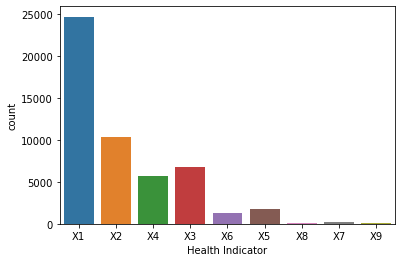

In [168]:
sns.countplot(train['Health Indicator'])

Correlation of data

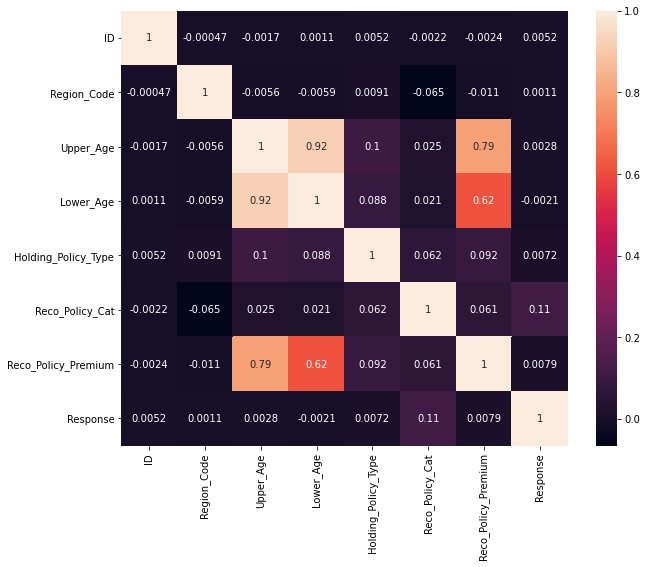

In [169]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot = True)
plt.show()

total number of people rented Vs owned

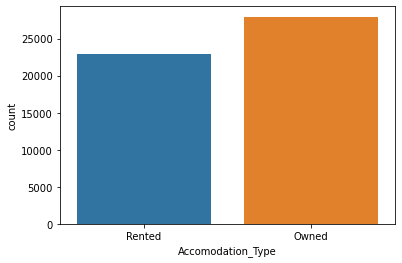

In [170]:
sns.countplot(train['Accomodation_Type'])

total number of people who have joint or Individual

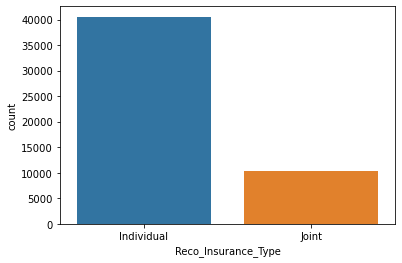

In [171]:
sns.countplot(train['Reco_Insurance_Type'])

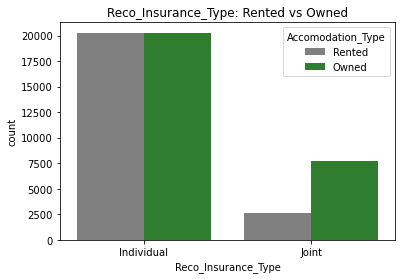

In [172]:
sns.countplot('Reco_Insurance_Type', hue='Accomodation_Type', data=train,palette=["#808080", "#228B22"])
plt.title('Reco_Insurance_Type: Rented vs Owned')
plt.show()

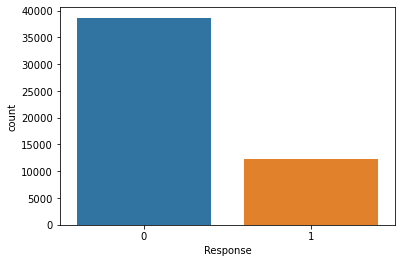

In [173]:
sns.countplot(train['Response'])

# Preprocessing of data 

In [174]:
# LabelEncoder use for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [175]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

Splits the data into Test & Train

In [181]:
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [182]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

Apply decisionTreeClassifier algorithum to predict

In [196]:
#DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_clf = clf.predict(X_valid)
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier Accuracy : ",accuracy_score(y_valid, y_clf))

Decision Tree Classifier Accuracy :  0.6678785496708264


the accuracy of the model is 0.66

In [ ]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, n_estimators = 500)

rf.fit(X_train,y_train)
predictions = rf.predict(X_valid)

from sklearn.metrics import accuracy_score
print("Randomforestclassification : ",accuracy_score(y_valid, predictions))


# Submission of the Response

we use DecisionTreeClassifier for prediction.

In [198]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
final_predictions = clf.predict(test)
submission['Response'] = final_predictions
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

In [199]:
result=pd.read_csv('my_submission.csv')

In [200]:
result

,ID,Response
0,50883,1
1,50884,0
2,50885,1
3,50886,1
4,50887,1
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0
